<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_5/Practice_Chapter5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import (
    load_iris, 
    make_moons
  )
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, 
    PolynomialFeatures
  )
from sklearn.svm import (
    LinearSVC, 
    SVC, 
    LinearSVR, 
    SVR, 
    OneClassSVM
  )

# Linear SVM Classification

In [3]:
iris = load_iris()
X, y = iris.data[:, (2, 3)], (iris.target==2).astype(np.int)

In [4]:
svm_clf = Pipeline(
    [
     ("scaler", StandardScaler()), 
     ("linear_svc", LinearSVC(loss="hinge", C=1.0))
    ]
)

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1])

# Non-Linear SVM Classification

In [7]:
X, y = make_moons(n_samples=100, noise=0.15)

In [11]:
poly_svm_clf = Pipeline(
    [
     ("poly_features", PolynomialFeatures(degree=3)), 
     ("scaler", StandardScaler()), 
     ("svm_clf", LinearSVC(loss="hinge", C=10.0, max_iter=2000))
    ]
)
poly_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

# Polynomial Kernel

In [15]:
X, y = make_moons(n_samples=100, noise=0.15)

In [16]:
poly_kernel_svm_clf = Pipeline(
    [ 
     ("scaler", StandardScaler()), 
     ("svm_clf", SVC(kernel="poly",  degree=3, coef0=1, C=5))
    ]
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

# Gaussing Radial Bias Kernel

In [17]:
X, y = make_moons(n_samples=100, noise=0.15)

rbf_kernel_svm_clf = Pipeline(
    [ 
     ("scaler", StandardScaler()), 
     ("svm_clf", SVC(kernel="rbf",  gamma=5, C=0.001))
    ]
)

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

# SVM Regression

Linear SVM Regression

In [20]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [21]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Polynomial SVM Regression

In [25]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [26]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# SVM for Anomaly Detection

Data

In [32]:
iris = load_iris()
X, y = iris.data[:, (0, 1)], iris.target

Model

In [33]:
model = OneClassSVM(kernel="rbf", gamma=0.001, nu=0.03)
model.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.03, shrinking=True, tol=0.001, verbose=False)

Predictions

In [35]:
preds = model.predict(X)
preds

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Outliers

In [36]:
X[preds==-1]

array([[4.3, 3. ],
       [4.5, 2.3],
       [7.7, 3.8],
       [7.7, 2.6],
       [7.9, 3.8]])

Visualizing Outliers

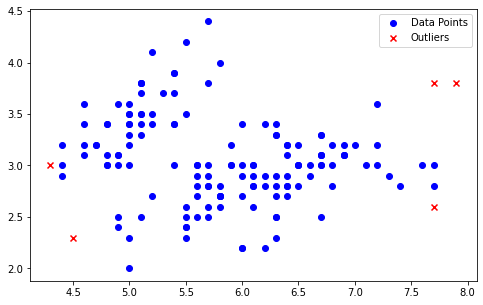

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X[preds==1][:, 0], X[preds==1][:, 1], color="blue", marker="o", label="Data Points")
ax.scatter(X[preds==-1][:, 0], X[preds==-1][:, 1], color="red", marker="x", label="Outliers")

plt.legend()
plt.show()